## 2022년도 서울 지하철 열차 내부 혼잡도를 분석해보자!
- 서울교통공사에서 제공하는 2022년 1년간의 1~8호선 라인 역들의 30분 단위 평균 혼잡도 데이터
- 혼잡도는 정원대비 승차인원으로, 승차인과 좌석수가 일치할 경우를 혼잡도 34%로 산점

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 데이터 로드

In [2]:
data = pd.read_csv('data/서울교통공사_지하철혼잡도정보_20221231.csv', encoding='euc-kr')
data

,연번,요일구분,호선,역번호,출발역,상하구분,5시30분,6시00분,6시30분,7시00분,...,20시00분,20시30분,21시00분,21시30분,22시00분,22시30분,23시00분,23시30분,00시00분,00시30분
0,1,평일,1,150,서울역,상선,7.3,18.1,18.1,30.9,...,15.6,17.1,17.7,14.9,13.7,17.2,10.4,8.8,8.8,1.2
1,2,평일,1,150,서울역,하선,11.5,11.0,13.2,21.4,...,35.3,36.1,35.0,29.4,39.2,26.1,17.1,11.8,8.5,0.0
2,3,평일,1,151,시청,상선,6.6,15.4,14.7,25.0,...,19.1,20.7,21.8,17.5,18.5,18.4,14.9,11.5,7.0,2.8
3,4,평일,1,151,시청,하선,9.0,9.1,14.6,20.0,...,30.5,32.4,31.1,28.5,30.2,22.2,15.4,10.1,6.5,0.8
4,5,평일,1,152,종각,상선,6.3,14.4,10.7,17.6,...,26.8,25.2,29.7,22.6,26.1,24.0,19.7,14.6,9.6,4.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1633,1654,공휴일,8,2827,모란,하선,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
1634,1655,공휴일,8,2828,남위례,상선,9.9,5.8,6.6,8.1,...,7.3,6.1,7.5,6.5,5.0,4.2,3.5,2.0,NaN,NaN
1635,1656,공휴일,8,2828,남위례,하선,2.1,3.0,3.7,3.0,...,17.1,16.6,22.8,19.0,18.8,14.8,15.7,10.0,NaN,NaN
1636,1657,공휴일,8,2828,남위례,상선,9.9,5.8,6.6,8.1,...,7.3,6.1,7.5,6.5,5.0,4.2,3.5,2.0,NaN,NaN


In [3]:
pd.set_option('display.max_columns', None)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1638 entries, 0 to 1637
Data columns (total 45 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   연번      1638 non-null   int64  
 1   요일구분    1638 non-null   object 
 2   호선      1638 non-null   int64  
 3   역번호     1638 non-null   int64  
 4   출발역     1638 non-null   object 
 5   상하구분    1638 non-null   object 
 6   5시30분   1612 non-null   float64
 7   6시00분   1638 non-null   float64
 8   6시30분   1638 non-null   float64
 9   7시00분   1638 non-null   float64
 10  7시30분   1638 non-null   float64
 11  8시00분   1638 non-null   float64
 12  8시30분   1638 non-null   float64
 13  9시00분   1638 non-null   float64
 14  9시30분   1638 non-null   float64
 15  10시00분  1638 non-null   float64
 16  10시30분  1638 non-null   float64
 17  11시00분  1638 non-null   float64
 18  11시30분  1638 non-null   float64
 19  12시00분  1638 non-null   float64
 20  12시30분  1638 non-null   float64
 21  13시00분  1638 non-null   float64
 22  

### 데이터 파악 및 가공

In [5]:
# 결측치가 있는 컬럼들은 없어도 큰 문제가 되지 않을 것 같으니 삭제하자.
# (5시 30분, 23시 30분, 00시00분, 00시 30분)

data = data.drop(['5시30분','23시30분','00시00분','00시30분'], axis=1)   #열방향인 좌에서 우로 지우기 위해 축 설정.
data.info()   # 열을 잘 지웠는지 확인하는 용

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1638 entries, 0 to 1637
Data columns (total 41 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   연번      1638 non-null   int64  
 1   요일구분    1638 non-null   object 
 2   호선      1638 non-null   int64  
 3   역번호     1638 non-null   int64  
 4   출발역     1638 non-null   object 
 5   상하구분    1638 non-null   object 
 6   6시00분   1638 non-null   float64
 7   6시30분   1638 non-null   float64
 8   7시00분   1638 non-null   float64
 9   7시30분   1638 non-null   float64
 10  8시00분   1638 non-null   float64
 11  8시30분   1638 non-null   float64
 12  9시00분   1638 non-null   float64
 13  9시30분   1638 non-null   float64
 14  10시00분  1638 non-null   float64
 15  10시30분  1638 non-null   float64
 16  11시00분  1638 non-null   float64
 17  11시30분  1638 non-null   float64
 18  12시00분  1638 non-null   float64
 19  12시30분  1638 non-null   float64
 20  13시00분  1638 non-null   float64
 21  13시30분  1638 non-null   float64
 22  

In [6]:
data['호선'].value_counts()

호선
5    336
2    306
7    252
6    214
3    204
4    162
8    104
1     60
Name: count, dtype: int64

In [7]:
data['요일구분'].value_counts()

요일구분
평일     552
공휴일    544
토요일    542
Name: count, dtype: int64

In [8]:
data['역번호'].value_counts()

역번호
2828    6
150     6
151     6
152     6
153     6
       ..
2612    2
2613    2
405     2
406     2
408     2
Name: count, Length: 279, dtype: int64

In [9]:
data['출발역'].value_counts()

출발역
종로3가         18
동대문역사문화공원    18
서울역          12
왕십리          12
시청           12
             ..
역촌            2
독바위           2
진접            2
오남            2
별내별가람         2
Name: count, Length: 243, dtype: int64

In [10]:
# 출발역 종류가 총 몇 개 인지   ~~ 유니크 값으로 잘 처리해야 해!
len(np.unique(data['출발역']))   # 출발역 데이터 리스트의 중복된 값을 없앤 유니크한 값의 개수.

243

In [11]:
# 출발역이 총신대입구역인 조건으로 검색   ~~~ 불리언 인덱싱 사용하면 돼~!!
data[data['출발역']=='총신대입구']

,연번,요일구분,호선,역번호,출발역,상하구분,6시00분,6시30분,7시00분,7시30분,8시00분,8시30분,9시00분,9시30분,10시00분,10시30분,11시00분,11시30분,12시00분,12시30분,13시00분,13시30분,14시00분,14시30분,15시00분,15시30분,16시00분,16시30분,17시00분,17시30분,18시00분,18시30분,19시00분,19시30분,20시00분,20시30분,21시00분,21시30분,22시00분,22시30분,23시00분
236,237,평일,4,432,총신대입구,상선,25.4,22.8,43.6,49.8,70.9,59.0,47.7,48.4,32.8,27.4,30.6,26.5,30.7,31.4,30.8,25.8,29.3,24.5,27.7,20.0,31.1,35.9,36.6,35.5,38.9,38.6,25.7,17.3,17.2,14.9,13.6,18.5,23.5,17.1,15.1
237,238,평일,4,432,총신대입구,하선,28.5,17.0,22.6,34.3,37.3,32.9,24.7,23.2,21.1,17.4,22.2,22.8,26.1,23.2,29.4,24.4,27.5,22.8,35.9,34.6,43.0,45.8,54.6,53.4,55.1,75.1,46.8,32.8,25.5,29.3,25.7,30.8,36.0,30.1,26.6
486,487,평일,7,2738,총신대입구,상선,61.4,51.4,82.1,101.4,138.7,99.5,95.0,85.6,53.5,44.0,39.6,35.2,35.1,39.6,37.0,35.5,32.2,32.1,31.3,32.1,33.8,42.4,43.1,44.7,46.1,37.6,32.3,29.2,24.9,24.1,27.2,24.2,22.8,18.2,16.4
487,488,평일,7,2738,총신대입구,하선,21.2,17.7,26.7,37.0,41.7,24.1,18.8,21.9,28.4,22.0,20.5,25.2,23.2,25.1,28.5,26.3,27.9,32.2,35.7,41.1,47.2,58.0,67.4,85.0,101.5,92.5,81.9,59.1,48.8,53.7,53.4,56.6,59.1,66.0,44.6
794,795,토요일,4,432,총신대입구,상선,13.6,13.2,14.1,21.8,27.0,28.5,31.9,35.8,42.6,43.1,43.2,42.8,39.6,41.2,47.2,33.2,43.0,37.8,42.5,40.7,35.5,45.2,38.6,40.7,39.7,33.8,28.0,24.5,19.6,22.0,23.1,19.7,20.2,19.9,23.7
795,796,토요일,4,432,총신대입구,하선,20.2,12.6,11.6,13.6,17.2,23.3,33.2,39.6,36.0,36.0,36.2,40.0,33.2,30.3,33.2,30.5,33.3,29.4,36.5,33.2,42.5,39.5,53.3,49.3,45.7,49.3,38.2,34.9,33.3,32.1,38.1,38.0,37.1,34.4,38.9
1034,1045,토요일,7,2738,총신대입구,상선,46.4,31.0,34.2,33.9,47.1,57.5,70.2,62.2,58.1,57.5,56.3,58.4,56.4,63.4,57.9,57.2,48.8,49.2,55.4,51.2,50.7,62.3,50.5,47.9,37.5,33.3,24.7,22.2,19.4,20.0,20.5,19.5,18.0,19.0,24.3
1035,1046,토요일,7,2738,총신대입구,하선,17.4,12.5,13.8,20.9,24.3,24.1,19.5,19.7,18.7,21.5,28.6,32.0,36.7,34.8,37.9,34.8,35.6,37.7,41.6,49.5,45.3,64.6,61.3,56.4,50.4,49.6,40.3,39.9,38.2,43.6,47.6,46.2,42.6,45.1,29.9
1330,1341,공휴일,4,432,총신대입구,상선,7.8,7.1,8.6,14.7,18.5,17.9,24.0,23.2,31.9,32.8,24.9,33.7,29.4,30.3,33.4,24.7,29.4,25.1,29.3,25.2,26.7,26.7,25.5,28.3,30.4,33.9,25.6,19.1,21.1,18.2,19.6,13.5,13.1,11.7,13.3
1331,1342,공휴일,4,432,총신대입구,하선,11.7,8.3,6.8,7.5,12.0,15.9,26.4,36.1,31.3,27.5,28.4,29.1,26.4,23.6,26.0,23.3,25.8,22.2,27.8,25.0,31.2,29.3,34.4,31.5,34.9,32.9,33.7,27.4,26.0,28.0,30.8,27.4,22.1,21.4,20.9


### 최대 혼잡도가 가장 높은 역을 찾아보자!
- '연번' 컬럼에서 '상하구분' 컬럼까지를 분리하고, 전체시간에서 혼잡도가 최대인 값을 구해서 '최대혼잡도' 컬럼을 생성한 후, 이 둘을 합쳐보자!

In [12]:
left = data.loc[:, :'상하구분']

In [13]:
right = data.loc[:, '6시00분':].max(axis=1)
# 6시00분 부터 끝까지 시간을 가져온 다음 그열 중에서 맥스인 최대 시간대. 즉 혼잡도가 가장 높은 시간대의 값을 뽑아옴.

In [14]:
# concat 으로 붙였을 때, Series의 이름이 컬럼명으로 들어감!
right.name = '최대혼잡도'

In [15]:
max_con = pd.concat([left, right], axis=1)     #기본정보들을 최대혼잡도와 열 방향으로 붙이기.
max_con             #concat 데이터나 시리즈를 이어 붙이는 함수

,연번,요일구분,호선,역번호,출발역,상하구분,최대혼잡도
0,1,평일,1,150,서울역,상선,82.7
1,2,평일,1,150,서울역,하선,107.8
2,3,평일,1,151,시청,상선,58.1
3,4,평일,1,151,시청,하선,105.5
4,5,평일,1,152,종각,상선,76.1
...,...,...,...,...,...,...,...
1633,1654,공휴일,8,2827,모란,하선,0.0
1634,1655,공휴일,8,2828,남위례,상선,23.7
1635,1656,공휴일,8,2828,남위례,하선,22.8
1636,1657,공휴일,8,2828,남위례,상선,23.7


In [16]:
# 최대혼잡도 컬럼 내부 값 기준 내림차순 정렬
max_con = max_con.sort_values(by='최대혼잡도', ascending = False)
max_con

,연번,요일구분,호선,역번호,출발역,상하구분,최대혼잡도
209,210,평일,4,418,성신여대입구,하선,185.5
211,212,평일,4,419,한성대입구,하선,184.5
207,208,평일,4,417,길음,하선,176.2
71,72,평일,2,226,사당,외선,172.3
213,214,평일,4,420,혜화,하선,171.5
...,...,...,...,...,...,...,...
980,991,토요일,7,2711,장암,상선,0.0
1516,1537,공휴일,7,2711,장암,상선,0.0
432,433,평일,7,2711,장암,상선,0.0
343,344,평일,5,2561,마천,하선,0.0


### 평일 총신대입구역에서 동작 방면으로 운행하는 열차의 혼잡도를 분석해보자!
- keyword
  1. 평일 : '요일구분' 컬럼
  2. 총신대입구역 : '출발역' 컬럼
  3. 동작 방면 : 4호선('호선'컬럼)이면서 상선('상하구분'컬럼)

In [17]:
# 위 조건들에 맞는 데이터만 출력해보세요.
result = data[(data['출발역']=='총신대입구') & (data['요일구분']=='평일') & (data['호선']==4) & (data['상하구분']=='상선')]
result

,연번,요일구분,호선,역번호,출발역,상하구분,6시00분,6시30분,7시00분,7시30분,8시00분,8시30분,9시00분,9시30분,10시00분,10시30분,11시00분,11시30분,12시00분,12시30분,13시00분,13시30분,14시00분,14시30분,15시00분,15시30분,16시00분,16시30분,17시00분,17시30분,18시00분,18시30분,19시00분,19시30분,20시00분,20시30분,21시00분,21시30분,22시00분,22시30분,23시00분
236,237,평일,4,432,총신대입구,상선,25.4,22.8,43.6,49.8,70.9,59.0,47.7,48.4,32.8,27.4,30.6,26.5,30.7,31.4,30.8,25.8,29.3,24.5,27.7,20.0,31.1,35.9,36.6,35.5,38.9,38.6,25.7,17.3,17.2,14.9,13.6,18.5,23.5,17.1,15.1


#### 평일 총신대입구역에서 동작 방면으로 운행하는 열차의 시간별 평균 혼잡도

In [18]:
result.loc[:, '6시00분':]

,6시00분,6시30분,7시00분,7시30분,8시00분,8시30분,9시00분,9시30분,10시00분,10시30분,11시00분,11시30분,12시00분,12시30분,13시00분,13시30분,14시00분,14시30분,15시00분,15시30분,16시00분,16시30분,17시00분,17시30분,18시00분,18시30분,19시00분,19시30분,20시00분,20시30분,21시00분,21시30분,22시00분,22시30분,23시00분
236,25.4,22.8,43.6,49.8,70.9,59.0,47.7,48.4,32.8,27.4,30.6,26.5,30.7,31.4,30.8,25.8,29.3,24.5,27.7,20.0,31.1,35.9,36.6,35.5,38.9,38.6,25.7,17.3,17.2,14.9,13.6,18.5,23.5,17.1,15.1


#### 전체 평균 혼잡도

In [19]:
result.loc[:, '6시00분':].mean(axis=1)

# 평균 혼잡도가 30 정도이므로 34에 비해 조금 낮은 수준 (평균적으로 열차에 빈자리가 조금 남아 있는 정도)

236    30.988571
dtype: float64

#### 최대 혼잡도

In [20]:
result.loc[:, '6시00분':].max(axis=1)

236    70.9
dtype: float64

#### 최저 혼잡도

In [21]:
result.loc[:, '6시00분':].min(axis=1)

236    13.6
dtype: float64

### plot chart 를 활용하여 총신대입구역에서 동작방면으로 시간대별 혼잡도 변화 추이를 시각화 해보자!

- x 축 값 설정

In [22]:
x = result.loc[:, '6시00분':].columns
x

Index(['6시00분', '6시30분', '7시00분', '7시30분', '8시00분', '8시30분', '9시00분', '9시30분',
       '10시00분', '10시30분', '11시00분', '11시30분', '12시00분', '12시30분', '13시00분',
       '13시30분', '14시00분', '14시30분', '15시00분', '15시30분', '16시00분', '16시30분',
       '17시00분', '17시30분', '18시00분', '18시30분', '19시00분', '19시30분', '20시00분',
       '20시30분', '21시00분', '21시30분', '22시00분', '22시30분', '23시00분'],
      dtype='object')

- y 축 값 설정

In [23]:
result.loc[:, '6시00분':].values

# 차트의 한 축에 값들을 넣기 위해서는 1차원 집합으로 변경시켜줘야 가능함. (현재는 2차원 배열)

array([[25.4, 22.8, 43.6, 49.8, 70.9, 59. , 47.7, 48.4, 32.8, 27.4, 30.6,
        26.5, 30.7, 31.4, 30.8, 25.8, 29.3, 24.5, 27.7, 20. , 31.1, 35.9,
        36.6, 35.5, 38.9, 38.6, 25.7, 17.3, 17.2, 14.9, 13.6, 18.5, 23.5,
        17.1, 15.1]])

In [24]:
# -1 : 여러개의 차원을 하나로 통합(데이터 값이 바뀌지는 않음) 
y = result.loc[:, '6시00분':].values.reshape(-1)
y

array([25.4, 22.8, 43.6, 49.8, 70.9, 59. , 47.7, 48.4, 32.8, 27.4, 30.6,
       26.5, 30.7, 31.4, 30.8, 25.8, 29.3, 24.5, 27.7, 20. , 31.1, 35.9,
       36.6, 35.5, 38.9, 38.6, 25.7, 17.3, 17.2, 14.9, 13.6, 18.5, 23.5,
       17.1, 15.1])

In [25]:
# result.loc[:, '6시00분':].values.reshape(35)  
#~~~~> 개수를 넣어줘도 되는데 굳이 셀 필요없이 -1 넣어서 통합시킴.

In [26]:
# 한글 설정
from matplotlib import rc
rc('font', family='Malgun Gothic')

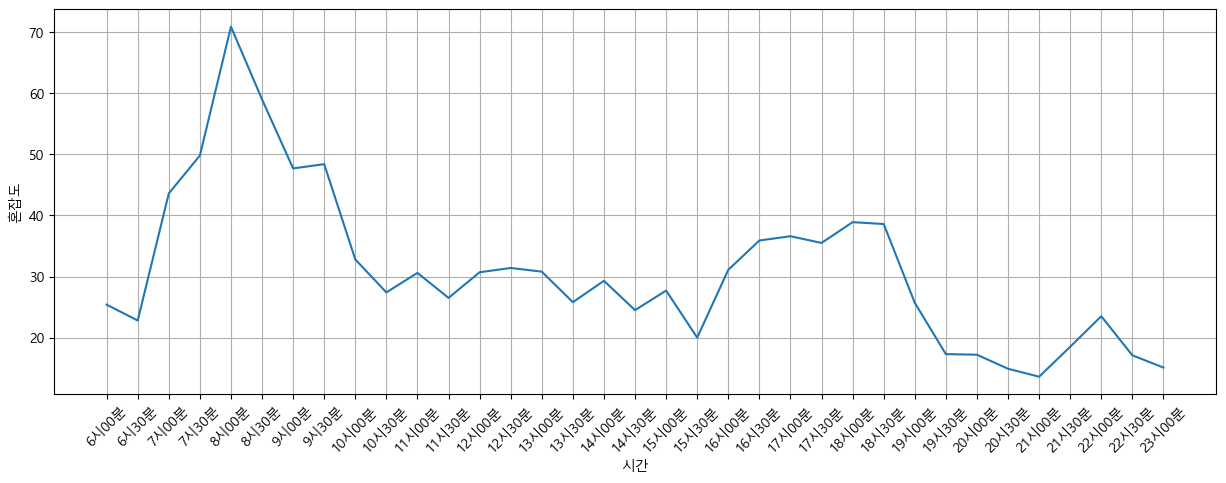

In [27]:
# 그래프로 출력
plt.figure(figsize=(15,5))
plt.plot(x,y)
plt.xticks(rotation=45)   # x축의 tick값드릐 회전 각도 설정  ~~~ 오 보기 편해짐
plt.xlabel('시간')
plt.ylabel('혼잡도')
plt.grid()
plt.show()

- 출근 시간인 07:30 ~ 08:30 까지는 혼잡도가 최대치
- 퇴근 시간인 17:30 ~ 18:30 까지의 혼잡도도 40가량
- 밤 시간대에 혼잡도는 최저치

### 상선을 봤으니 하선도 보자!
- 열차의 평균혼잡도, 최대혼잡도, 최저혼잡도 출력하기
- 시간별 혼잡도 그래프 출력

In [34]:
result_under = data[(data['출발역']=='총신대입구') & (data['요일구분']=='평일') & (data['호선']==4) & (data['상하구분']=='하선')]
result_under

,연번,요일구분,호선,역번호,출발역,상하구분,6시00분,6시30분,7시00분,7시30분,8시00분,8시30분,9시00분,9시30분,10시00분,10시30분,11시00분,11시30분,12시00분,12시30분,13시00분,13시30분,14시00분,14시30분,15시00분,15시30분,16시00분,16시30분,17시00분,17시30분,18시00분,18시30분,19시00분,19시30분,20시00분,20시30분,21시00분,21시30분,22시00분,22시30분,23시00분
237,238,평일,4,432,총신대입구,하선,28.5,17.0,22.6,34.3,37.3,32.9,24.7,23.2,21.1,17.4,22.2,22.8,26.1,23.2,29.4,24.4,27.5,22.8,35.9,34.6,43.0,45.8,54.6,53.4,55.1,75.1,46.8,32.8,25.5,29.3,25.7,30.8,36.0,30.1,26.6


In [35]:
result_under.loc[:, '6시00분':].mean(axis=1)

237    32.528571
dtype: float64

In [36]:
result_under.loc[:, '6시00분':].max(axis=1)

237    75.1
dtype: float64

In [37]:
result_under.loc[:, '6시00분':].min(axis=1)

237    17.0
dtype: float64

In [38]:
y_under = result_under.loc[:, '6시00분':].values.reshape(-1)

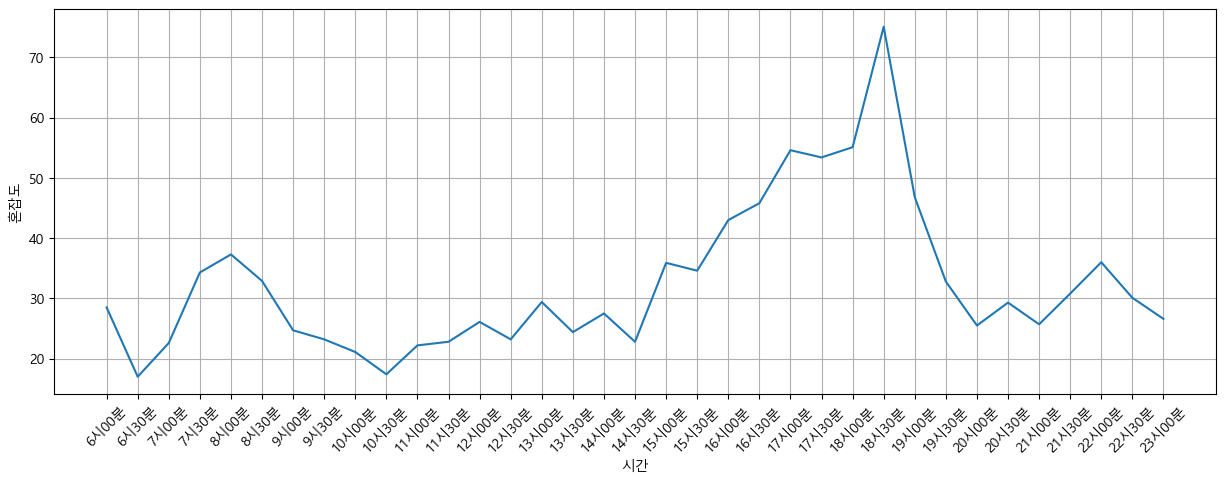

In [39]:
plt.figure(figsize=(15,5))
plt.plot(x,y_under)
plt.xticks(rotation=45)   # x축의 tick값드릐 회전 각도 설정  ~~~ 오 보기 편해짐
plt.xlabel('시간')
plt.ylabel('혼잡도')
plt.grid()
plt.show()

#### 상선,하선 그래프를 합쳐서 보자!

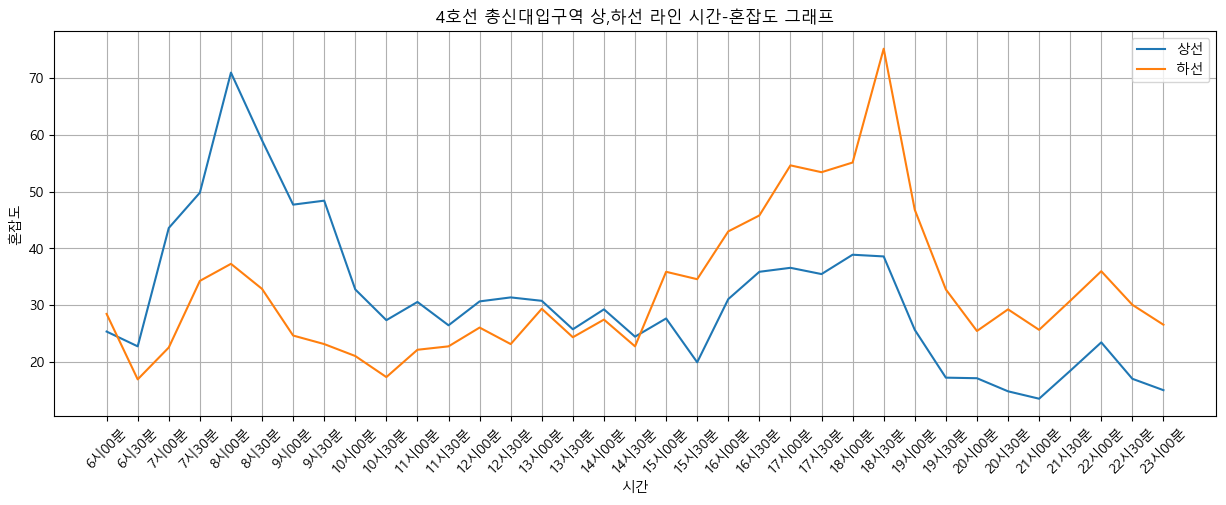

In [40]:
plt.figure(figsize=(15,5))

plt.plot(x,y, label = "상선")
plt.plot(x,y_under, label = "하선")

plt.xticks(rotation=45) 
plt.title("4호선 총신대입구역 상,하선 라인 시간-혼잡도 그래프")
plt.xlabel('시간')
plt.ylabel('혼잡도')

plt.legend()             # 여러 개의 막대가 있을 시 두 선을 따로 알려주며 표시해주는 설명
plt.grid()
plt.show()

### 결론 
- 지하철을 이용하는 사람들은 직장 출,퇴근용으로 많이 이용한다는 것을 알 수 있음(출,퇴근 시간의 혼잡도가 월등히 높음)
- 총신대입구역을 기준으로 보았을 때 동작방면(상선)으로 출근하는 사람들이 많고, 사당방면(하선)으로 퇴근하는 사람들이 많음
- 즉 총신대입구역을 기준으로 4호선 라인만 봤을 때, 강북권에 직장이 많고, 강남권에 주거하는 사람들이 많은 것을 유추해 볼 수 있음